# Import Necessary Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
from collections import Counter

# Load the data set

In [8]:
current_directory = os.getcwd()
data = pd.read_csv(current_directory + '\creditcard.csv')
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Exploration

### Dataset Information:

The dataset contains 284,807 entries and 31 columns.
The features include time, V1 to V28 (presumably anonymized variables), amount, and class (target variable).

### Missing Values:
There are no missing values in the dataset, as indicated by the absence of null values for any features.

### Categorical Features:
There are no categorical features in the dataset, as all features are of numerical type.

### Duplicate Entries:
The dataset initially had duplicate entries, but you removed them, resulting in a clean dataset.

### Skewed Data:
You identified skewed data and applied a log transformation to address the issue.

### Outlier Analysis:
Outlier analysis was conducted using the standard deviation method. A total of 473 outliers were identified and removed from the dataset.

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
null_features = []
for features in data.columns:
    if data[features].isna().sum() > 1:
        null_features.append(features)

null_features

[]

Hence, there are no null values in my dataset

In [20]:
# Checking if there are any categorical variables
Categorical_features = []
for features in data.columns:
    if data[features].dtype == 'O':
        Categorical_features.append(features)

Categorical_features

[]

Hence, there are no categorical features

In [29]:
# Checking for duplicates
data.duplicated().sum()

1081

In [31]:
data = data.drop_duplicates()
data.duplicated().sum()

0

### Visualisations to check for skewed data and Outliers

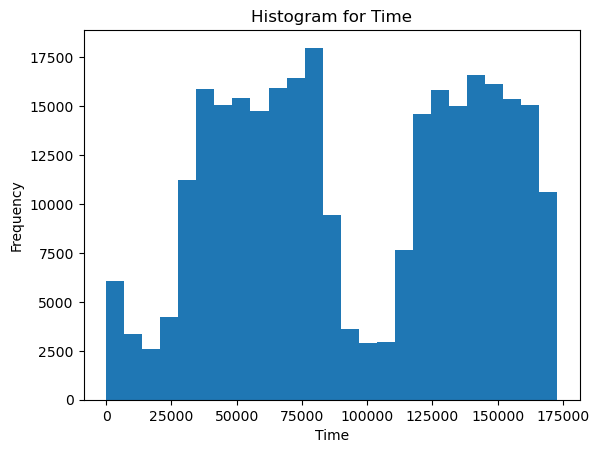

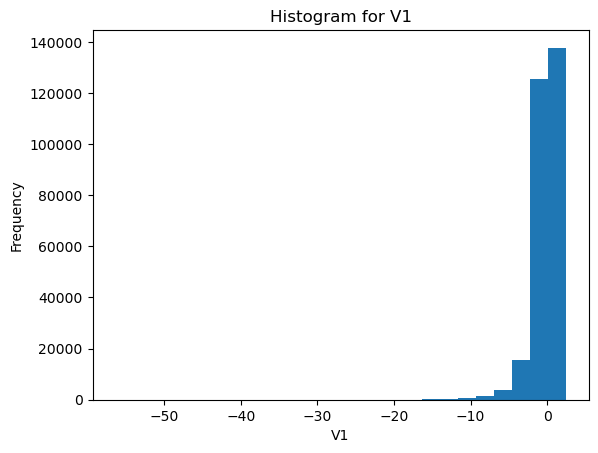

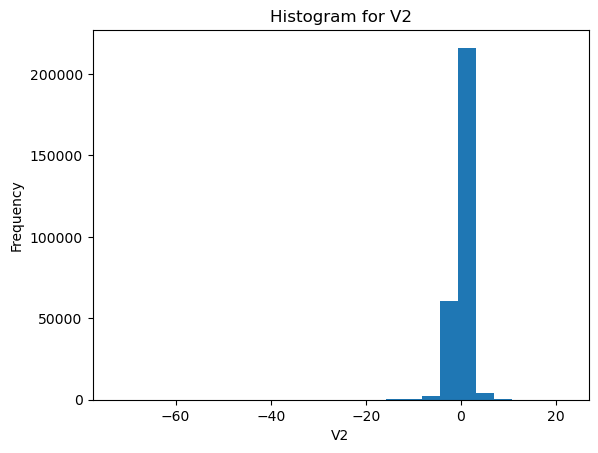

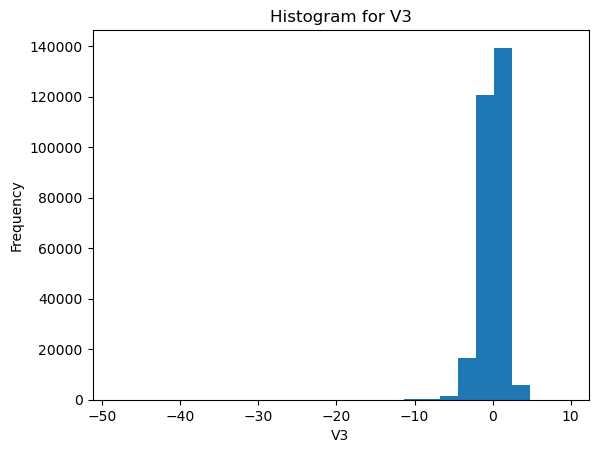

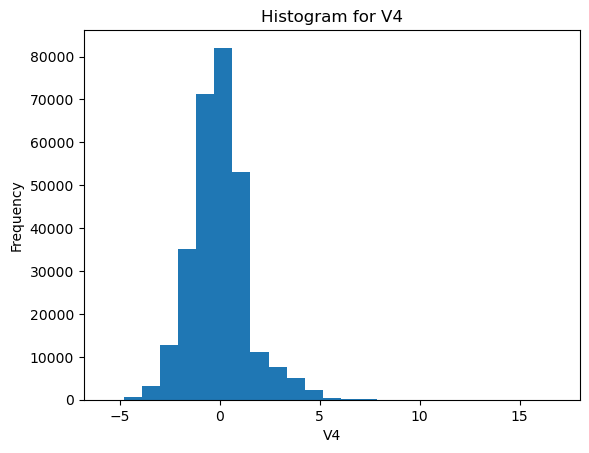

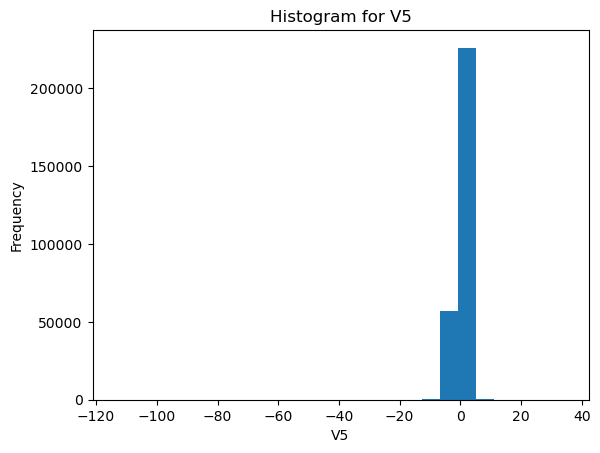

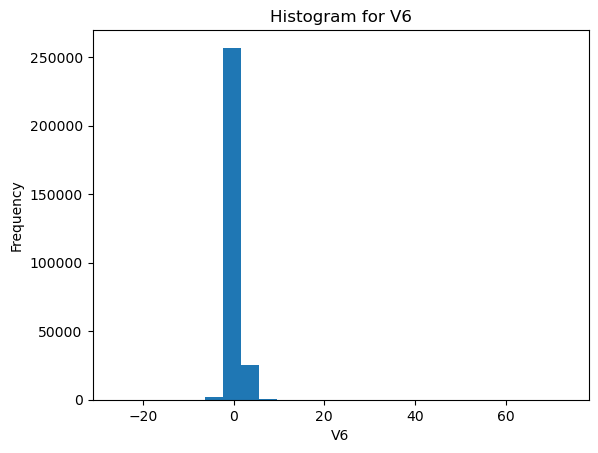

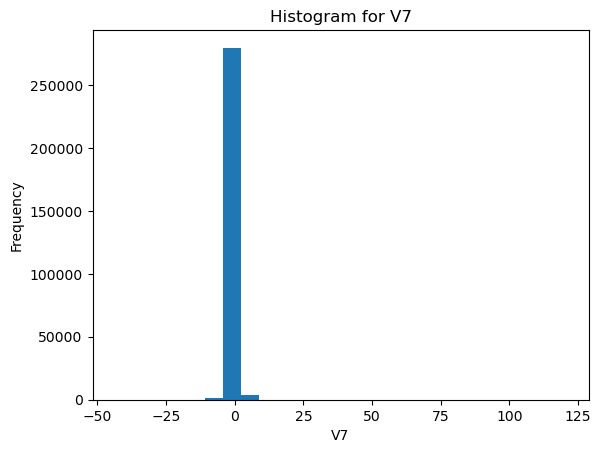

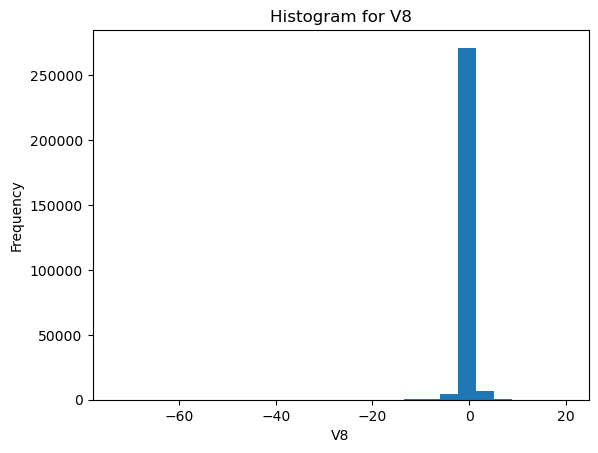

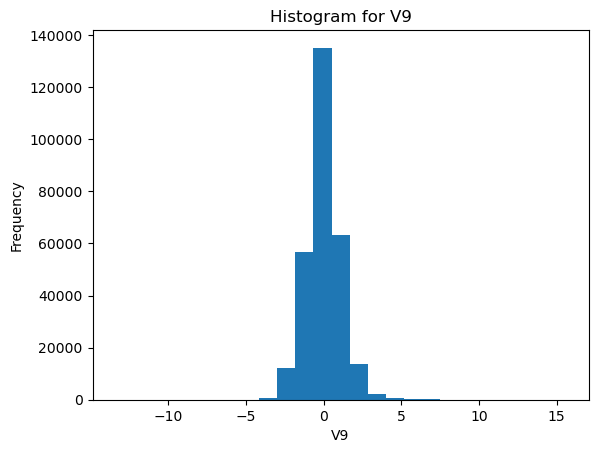

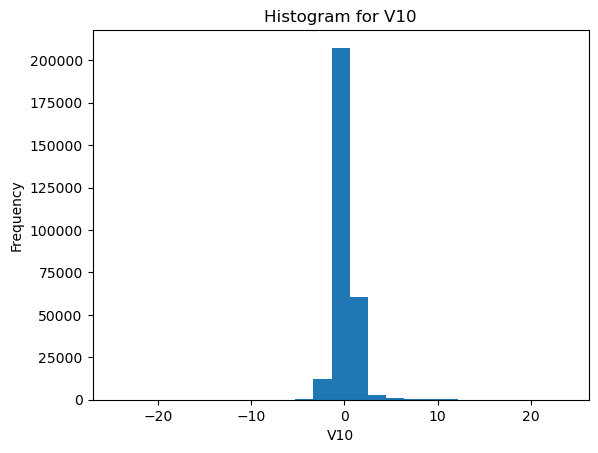

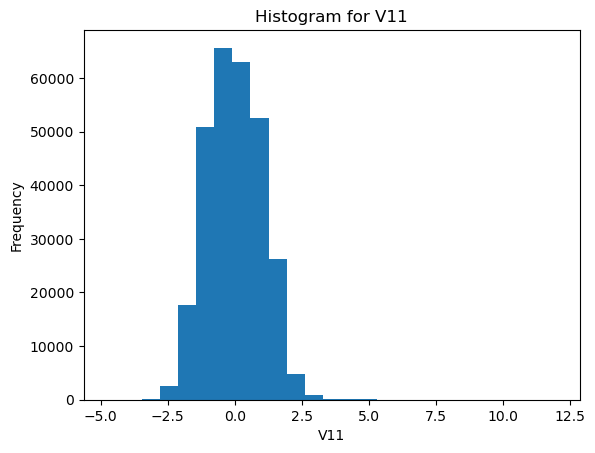

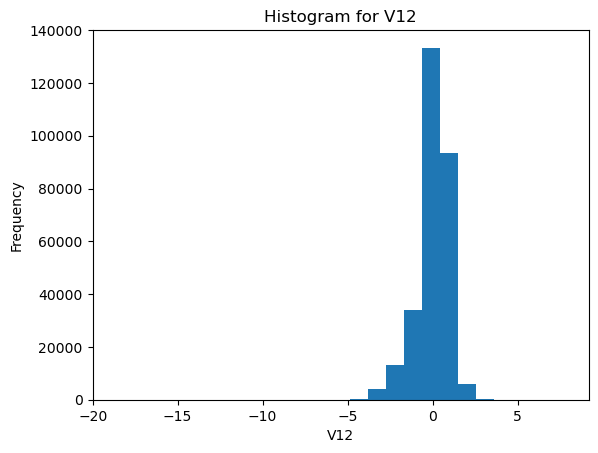

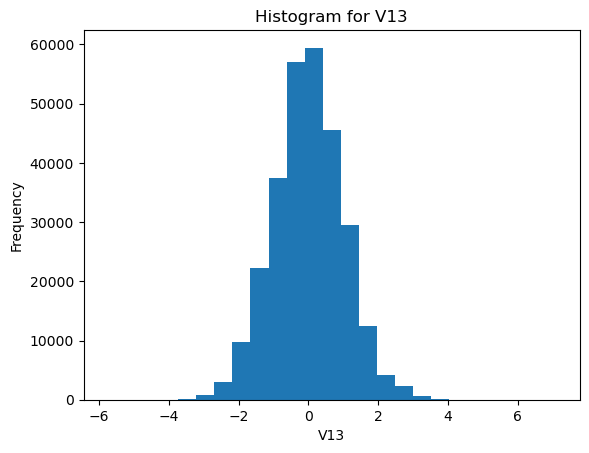

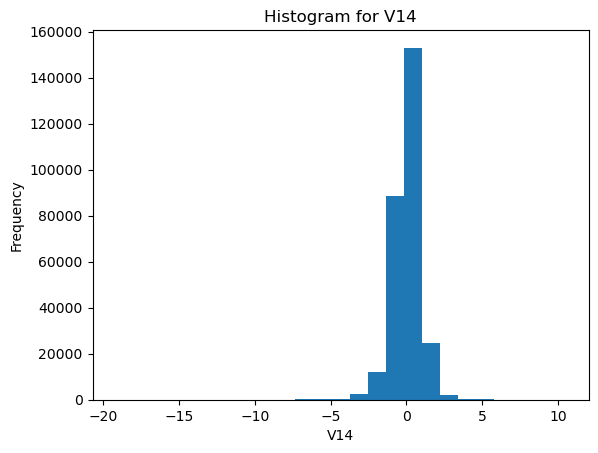

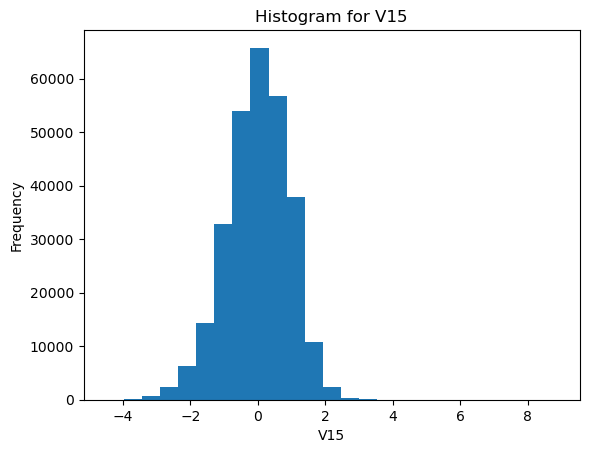

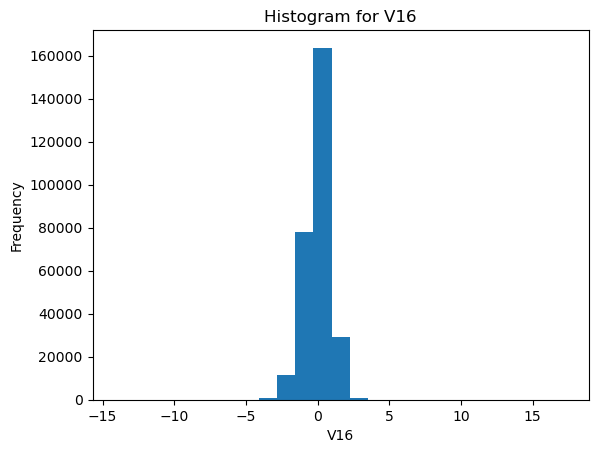

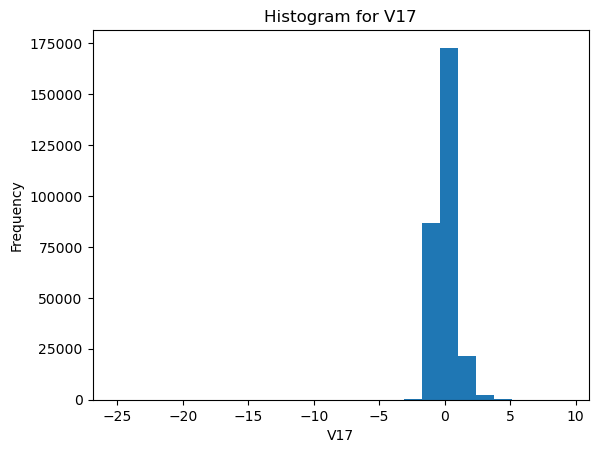

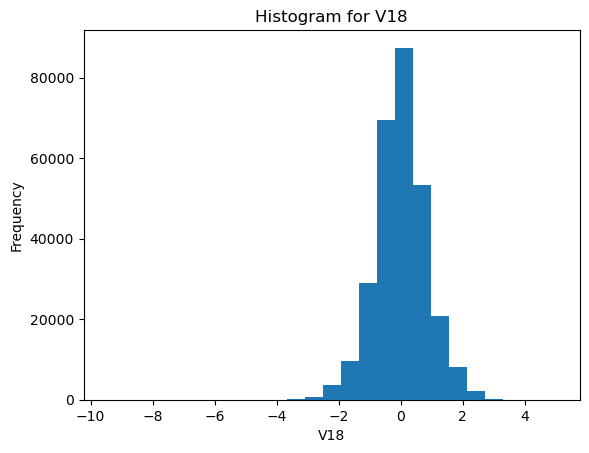

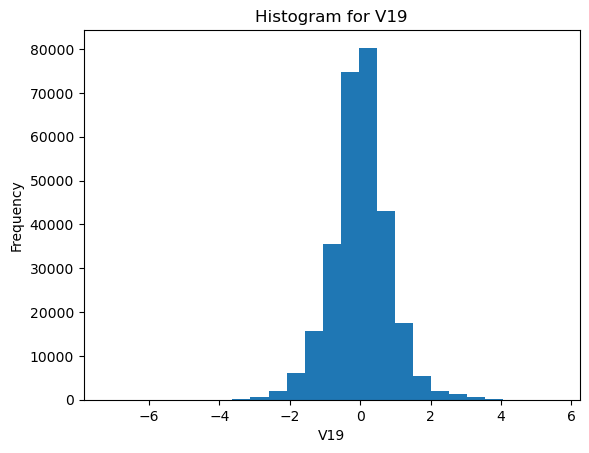

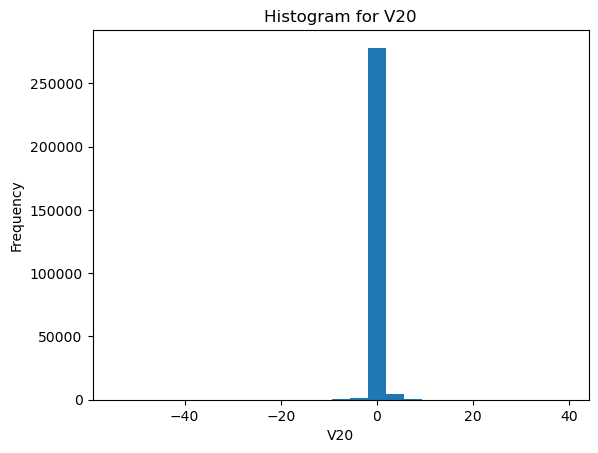

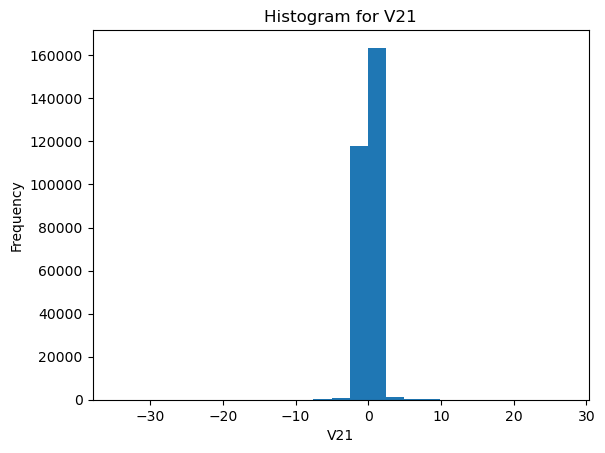

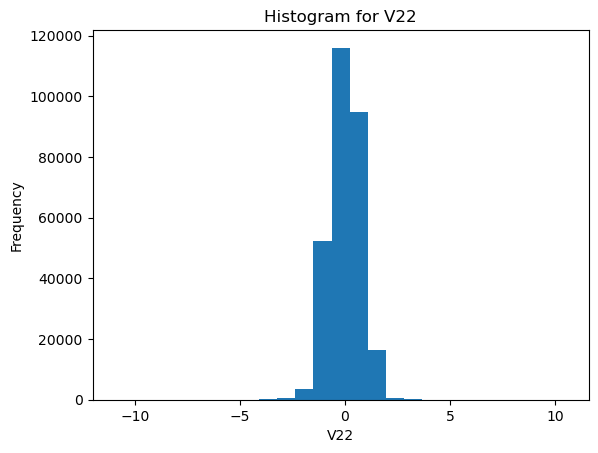

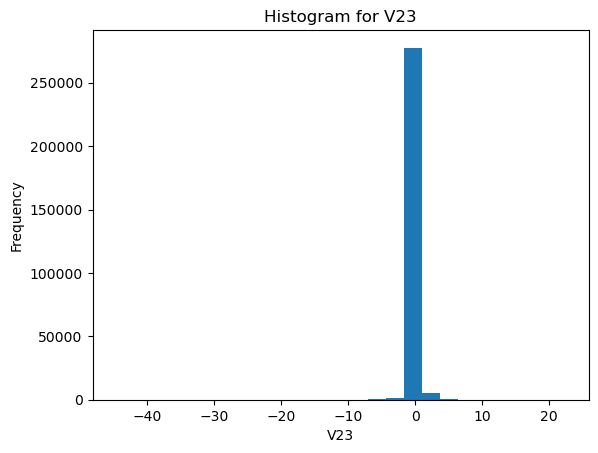

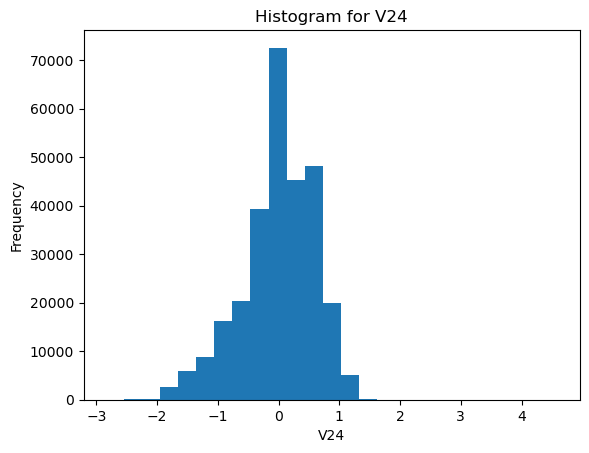

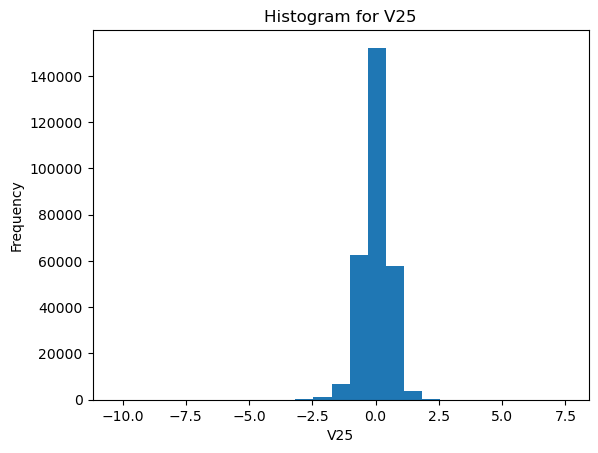

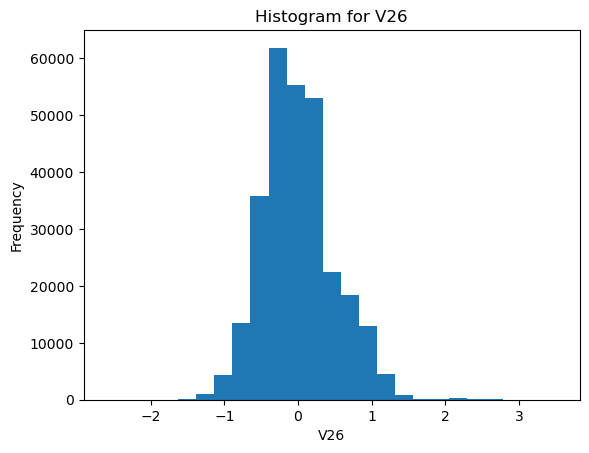

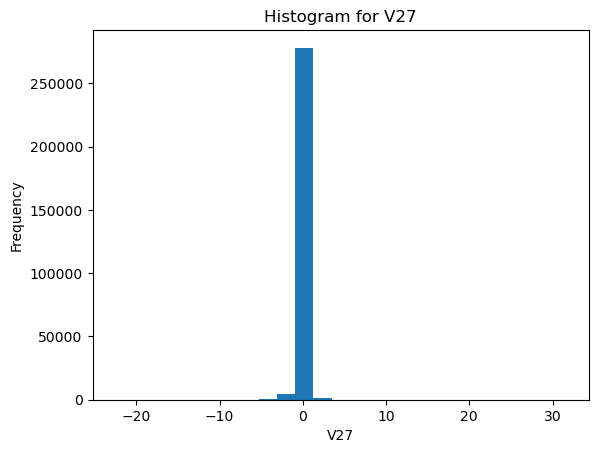

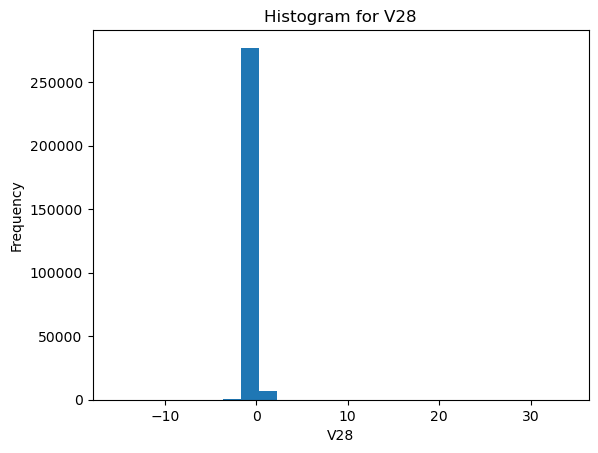

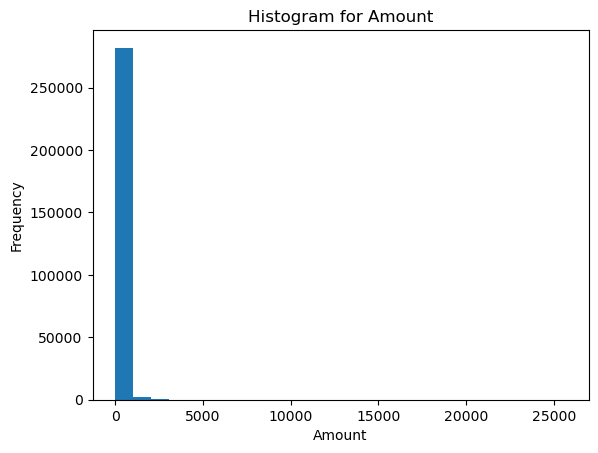

In [22]:
for feature in data.columns:
    if feature != 'Class':
        plt.hist(data[feature], bins=25)
        plt.title(f'Histogram for {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

Some data happen to be skewed. To fix that, I would take the log of these data.

### Outlier Analysis

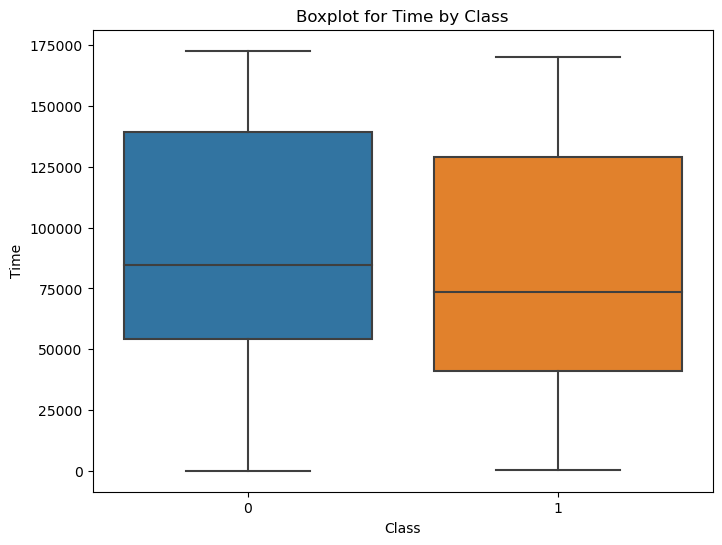

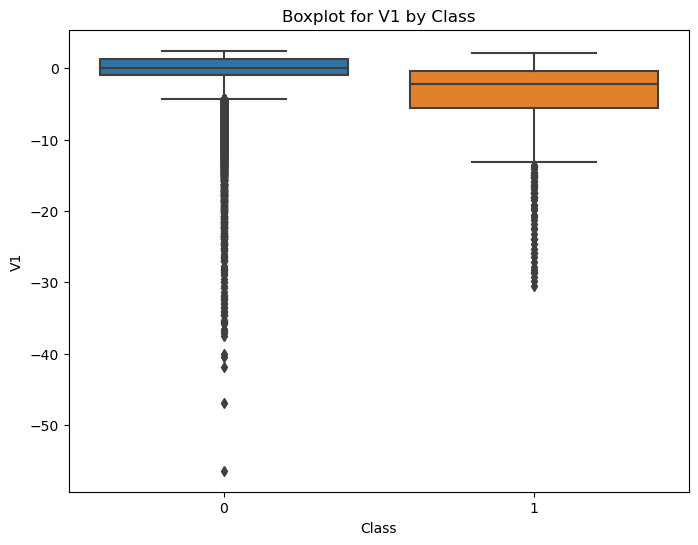

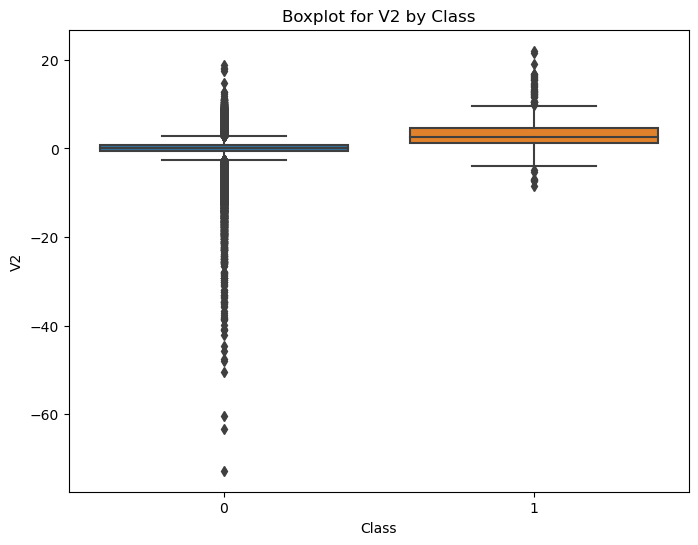

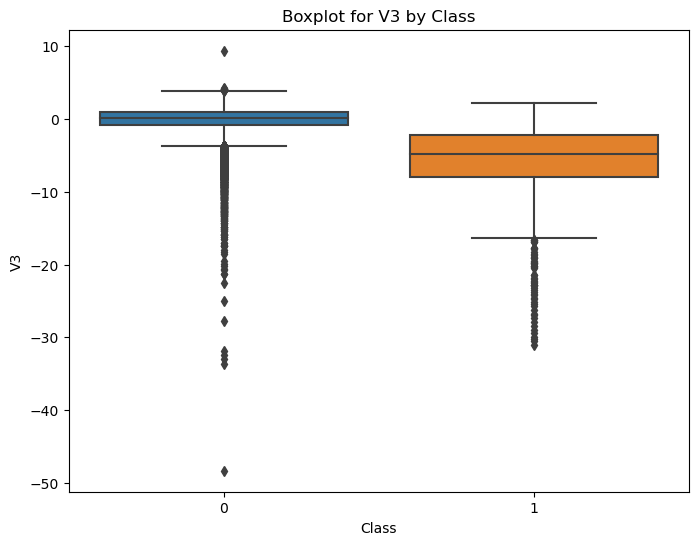

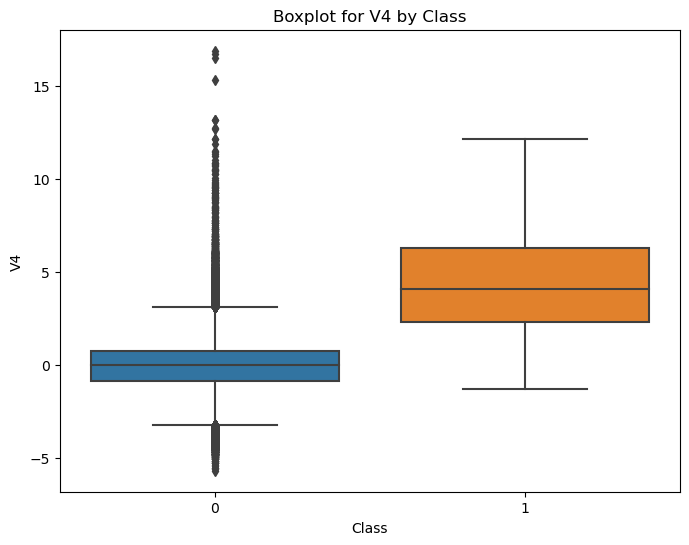

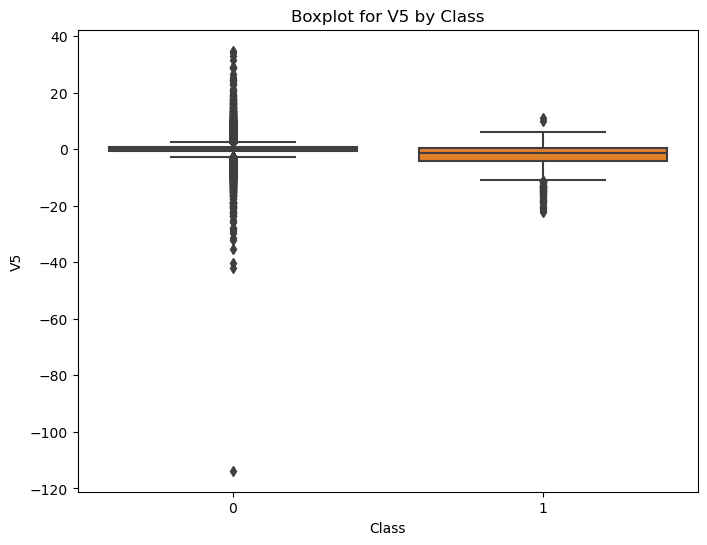

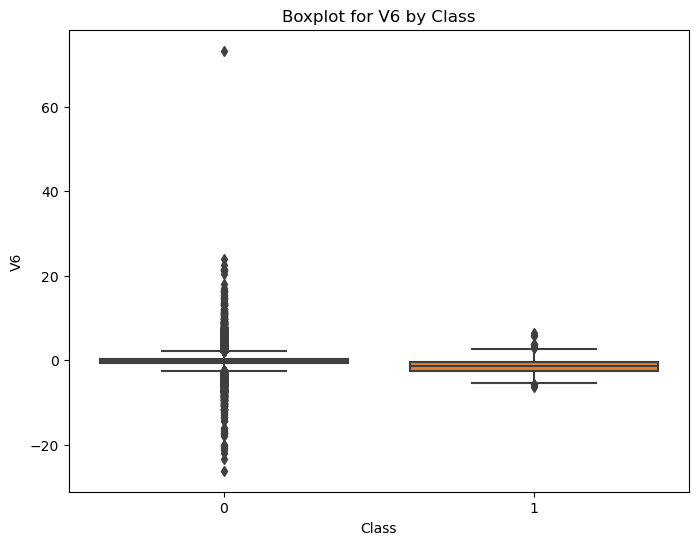

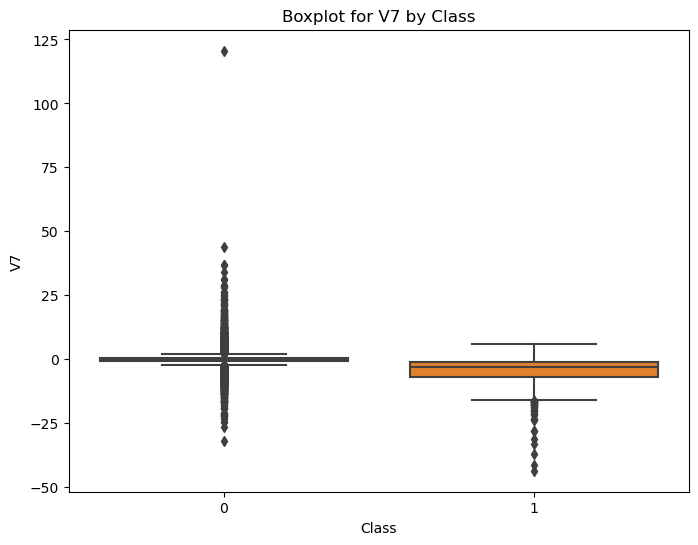

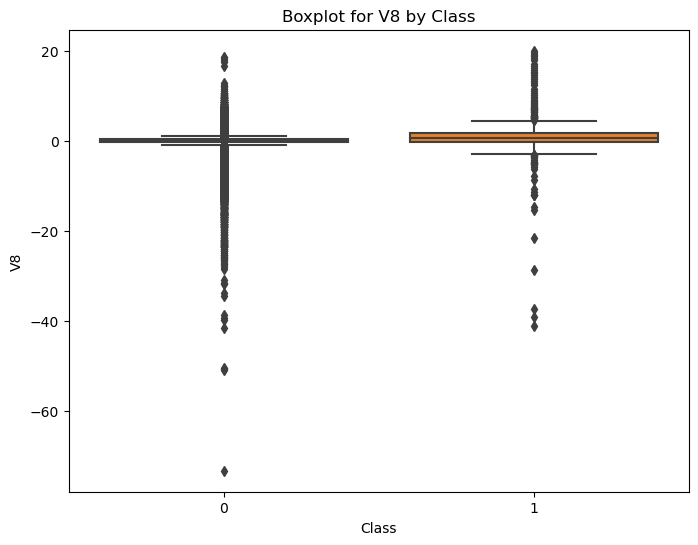

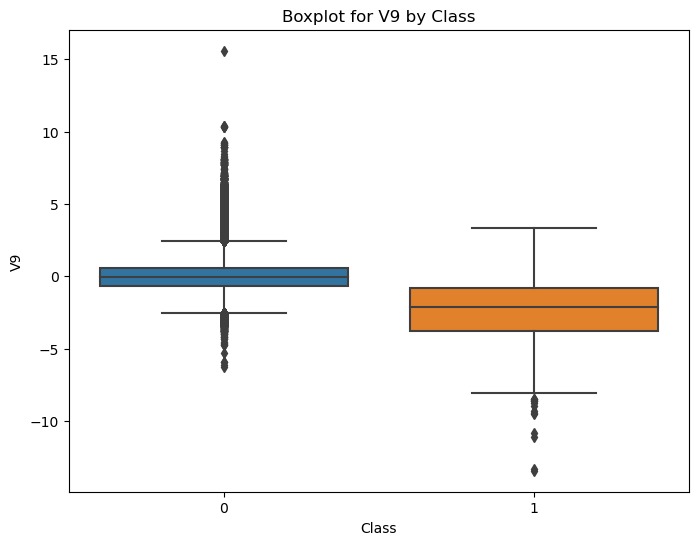

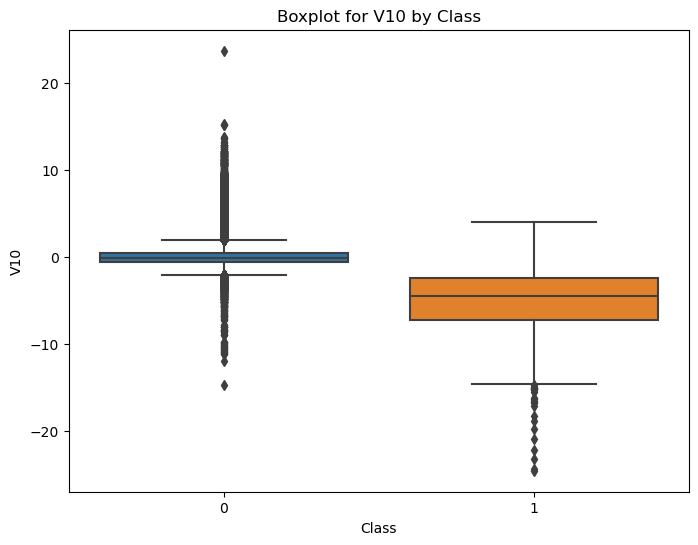

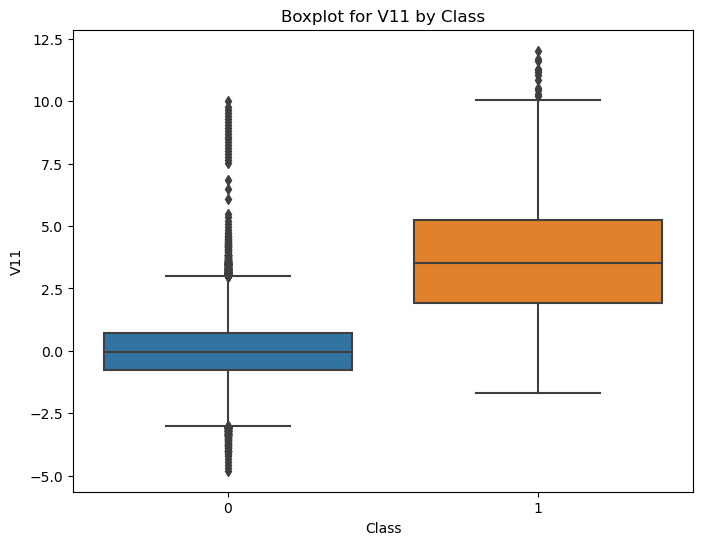

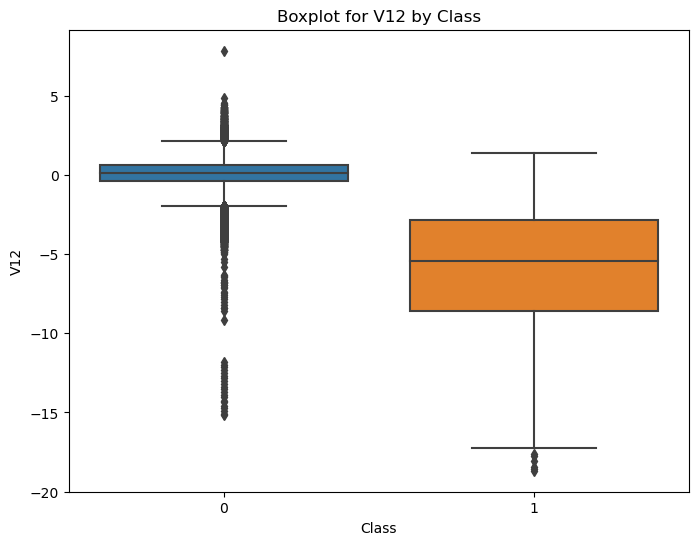

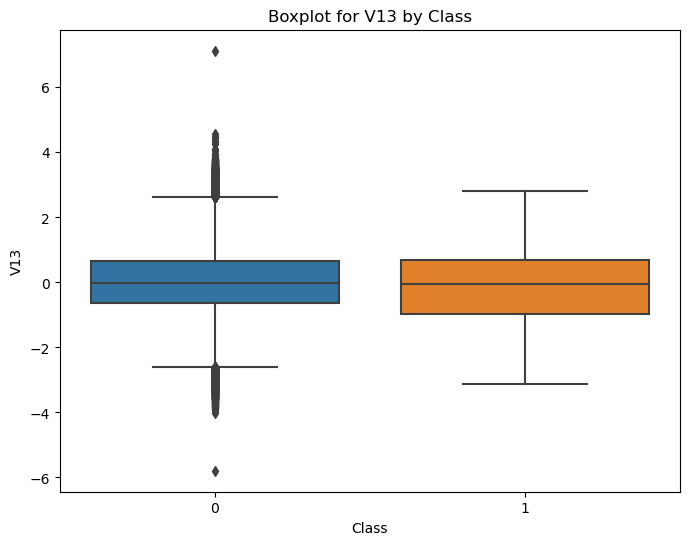

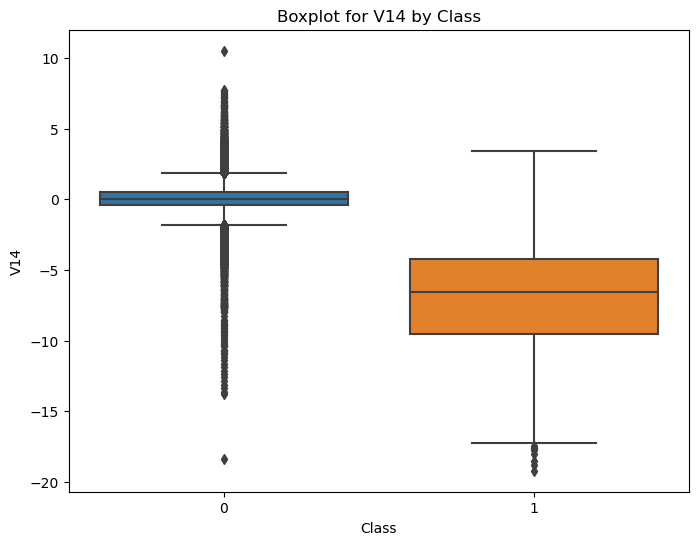

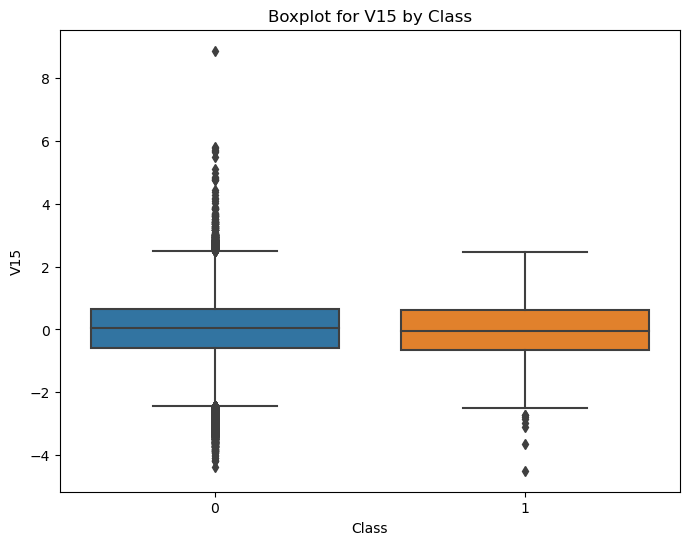

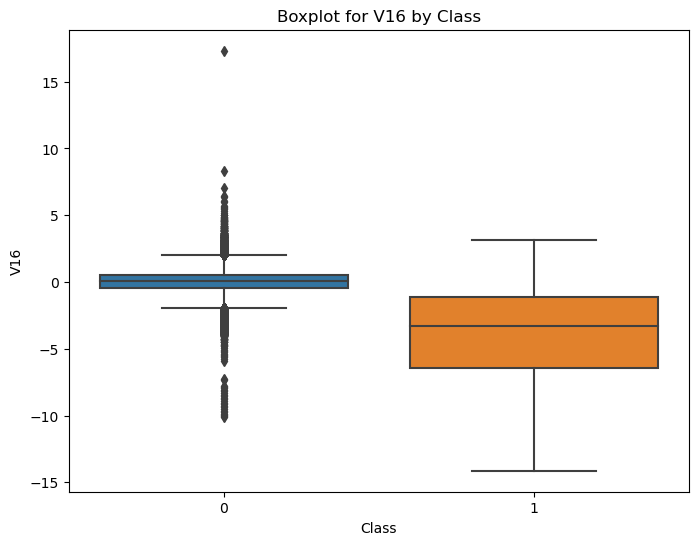

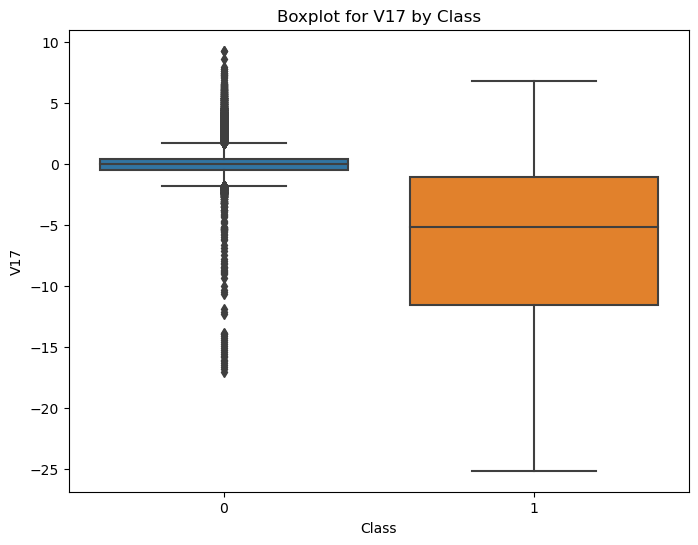

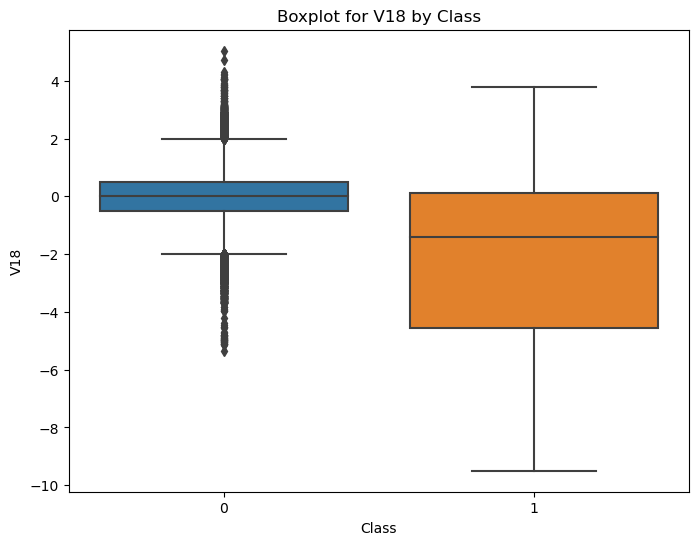

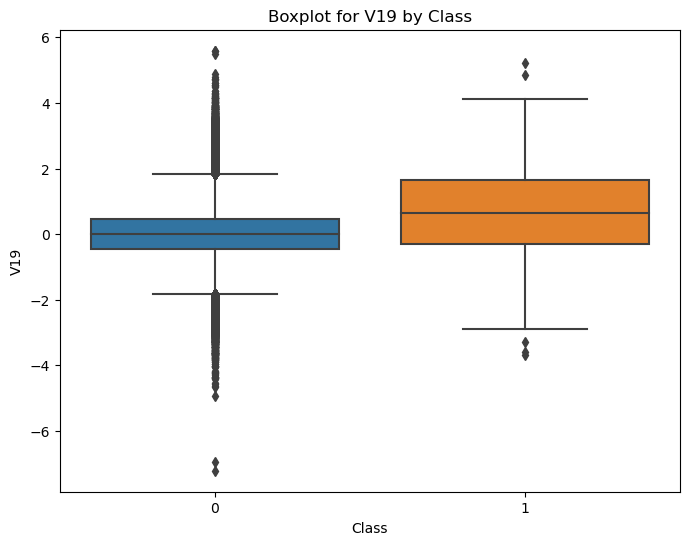

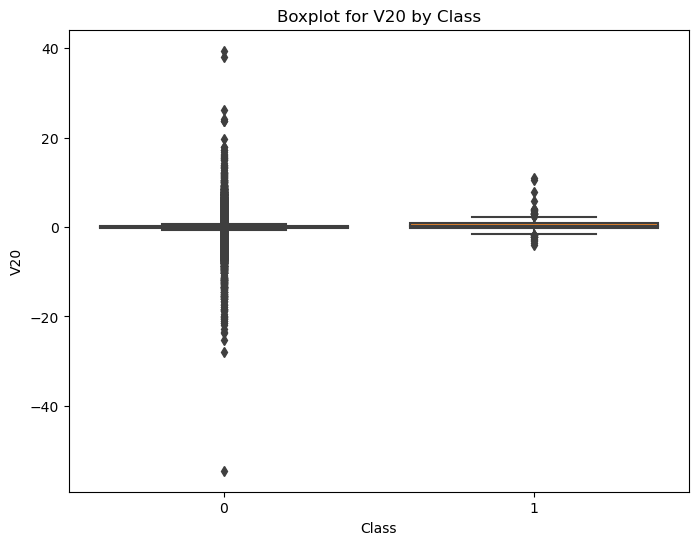

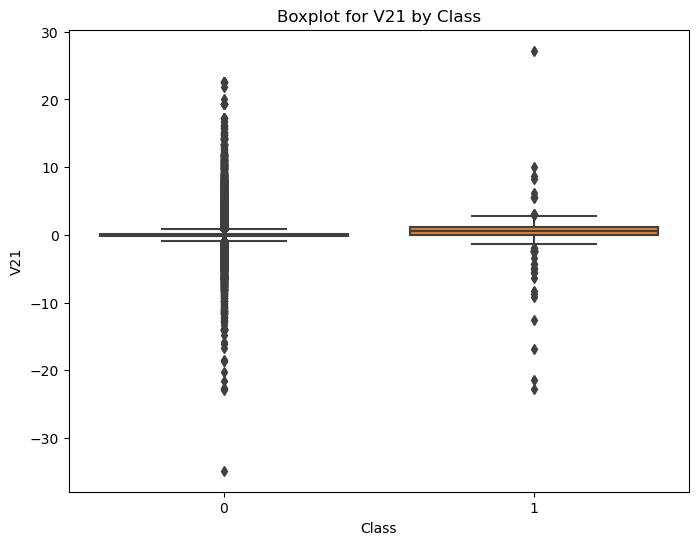

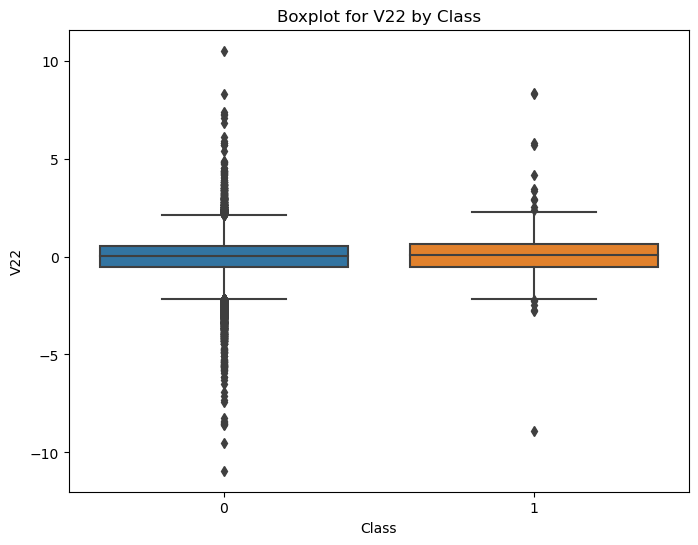

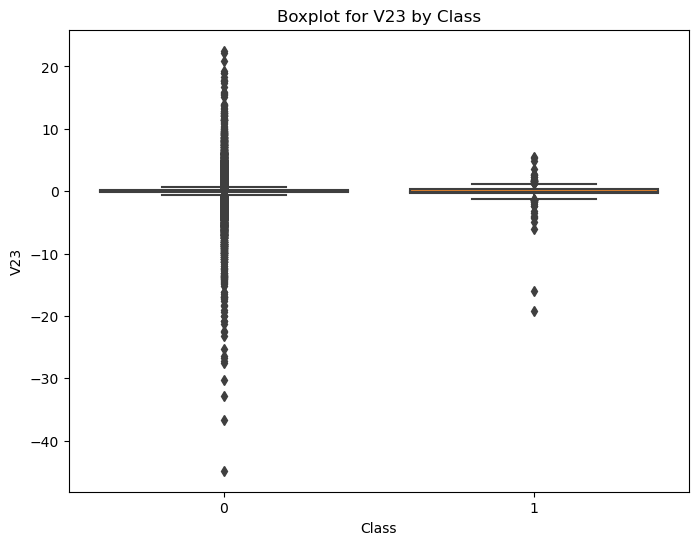

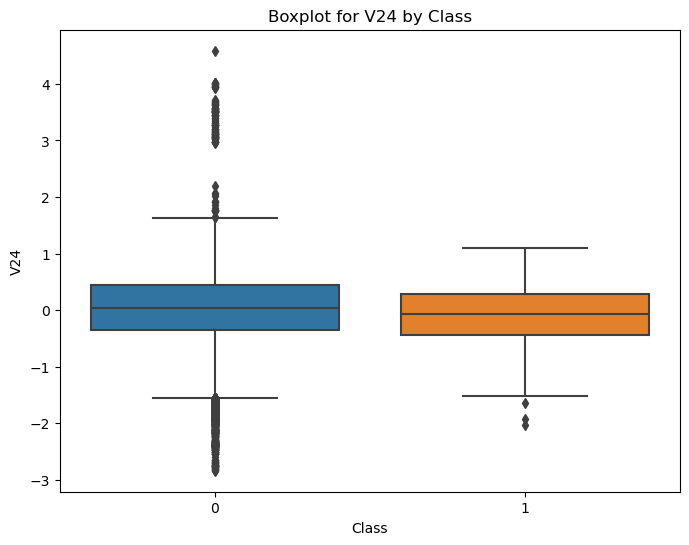

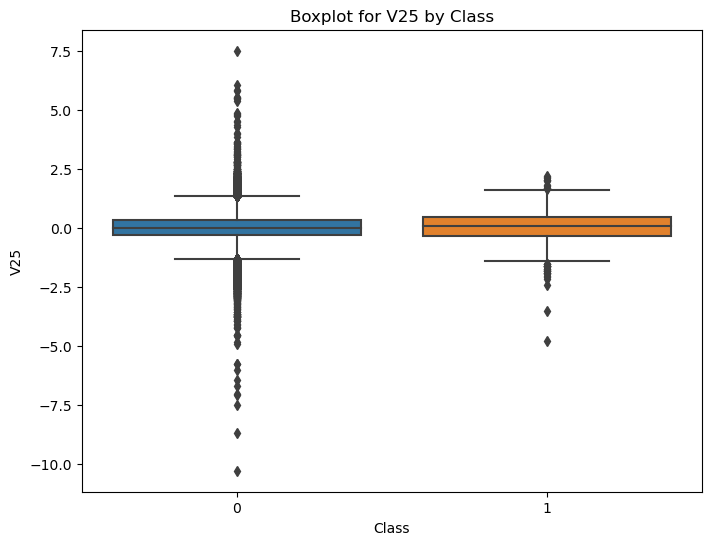

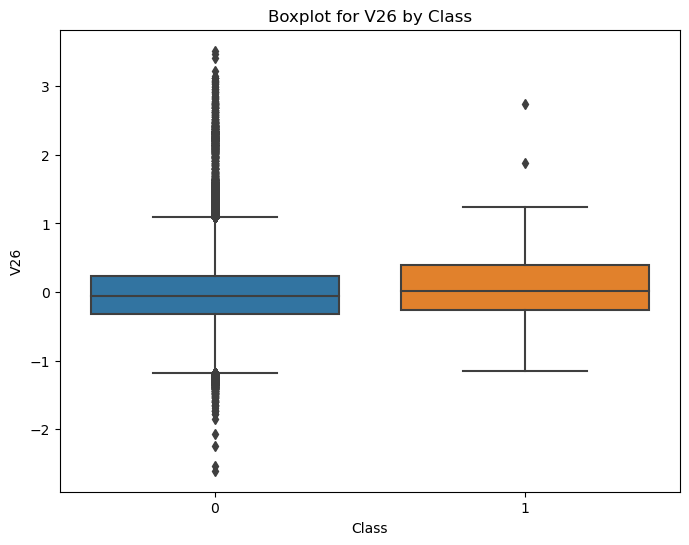

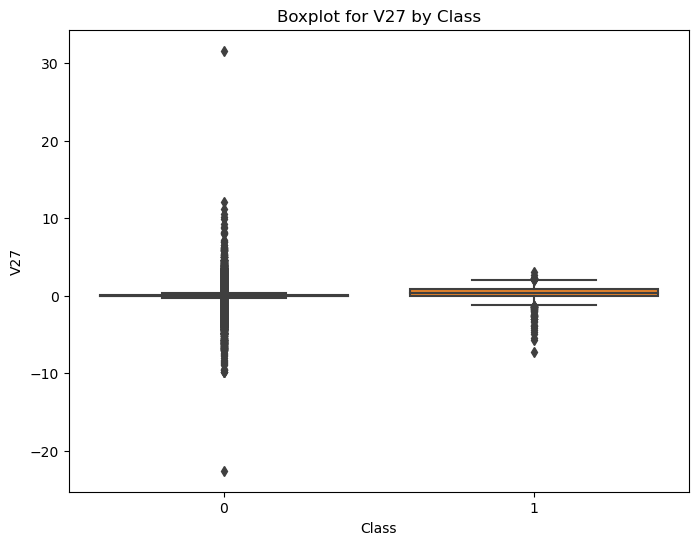

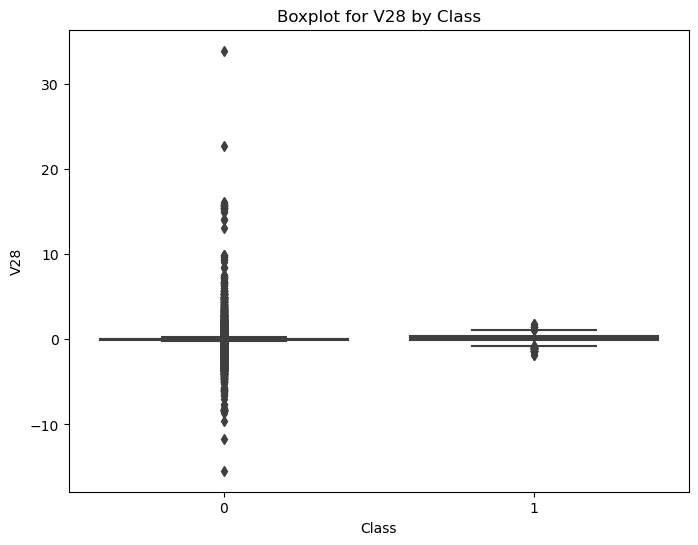

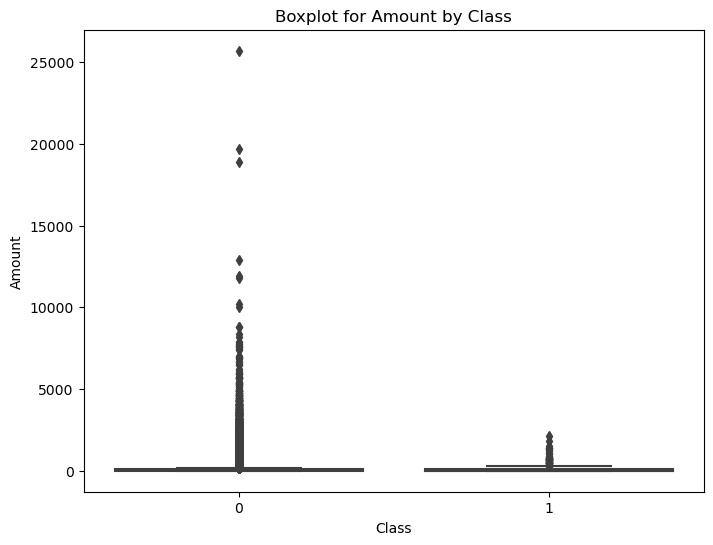

In [33]:
for feature in data.columns:
    if feature != 'Class':
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Class', y=data[feature], data=data)
        plt.title(f'Boxplot for {feature} by Class')
        plt.show()

In [38]:
def StDev_method (df,n,features):
    """
    Takes a dataframe df of features and returns an index list corresponding to the observations 
    containing more than n outliers according to the standard deviation method.
    """
    outlier_indices = []
    
    for column in features:
        # calculate the mean and standard deviation of the data frame
        data_mean = df[column].mean()
        data_std = df[column].std()
        
        # calculate the cutoff value
        cut_off = data_std * 3
        
        # Determining a list of indices of outliers for feature column        
        outlier_list_column = df[(df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        
        # appending the found outlier indices for column to the list of outlier indices 
        outlier_indices.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > data_mean + cut_off]
    df2 = df[df[column] < data_mean - cut_off]
    print('Total number of outliers is:', df1.shape[0]+ df2.shape[0])
    
    return multiple_outliers   

In [39]:
Outliers_StDev = StDev_method(data,1,data.columns)
# Printing the first 100 outliers
print(Outliers_StDev[:100])

Total number of outliers is: 473
[164, 290, 1158, 1632, 2178, 2464, 2682, 2792, 2957, 2963, 3509, 3554, 4235, 4608, 4810, 5296, 5371, 5425, 5526, 5534, 5535, 5715, 5797, 5888, 6223, 6467, 6501, 6624, 6727, 6783, 6812, 6905, 6958, 6969, 7080, 7081, 7090, 7104, 7144, 7178, 7246, 7255, 7277, 7348, 7420, 7485, 7522, 7523, 7560, 7578, 7580, 7616, 7617, 7743, 7744, 8447, 8487, 8488, 8572, 8610, 8683, 8820, 8855, 8973, 9106, 9119, 9545, 9895, 10115, 10131, 10460, 10483, 10515, 10535, 10567, 10573, 10582, 10584, 10607, 10690, 10801, 10804, 10891, 10897, 10900, 10913, 11033, 11222, 11300, 11343, 11364, 11465, 11681, 11710, 11841, 11842, 11880, 11891, 11956, 12021]


In [41]:
data_out2 = data.drop(Outliers_StDev, axis = 0).reset_index(drop = True)
data_out2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


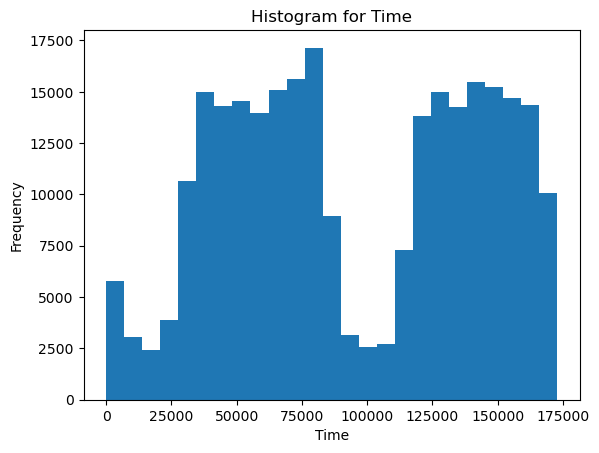

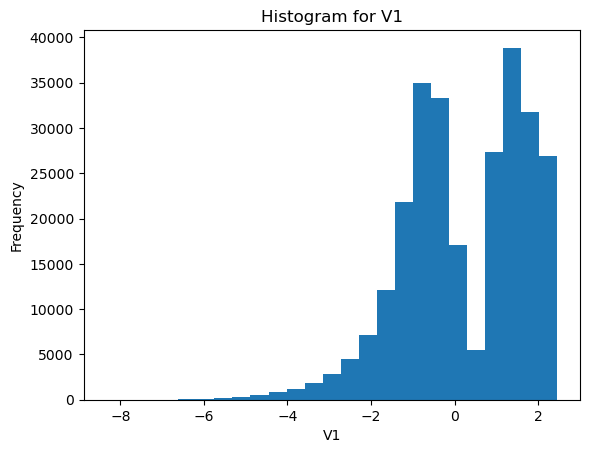

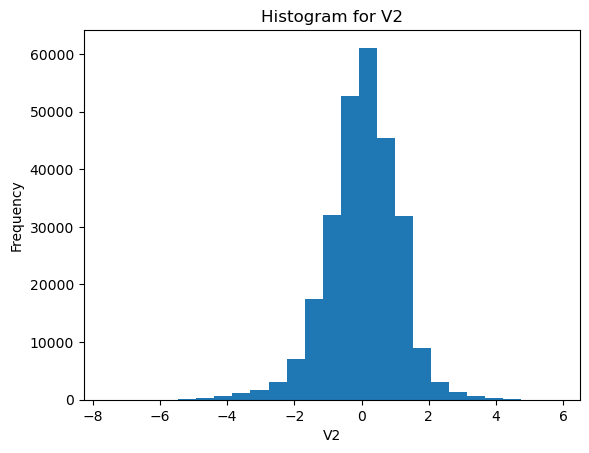

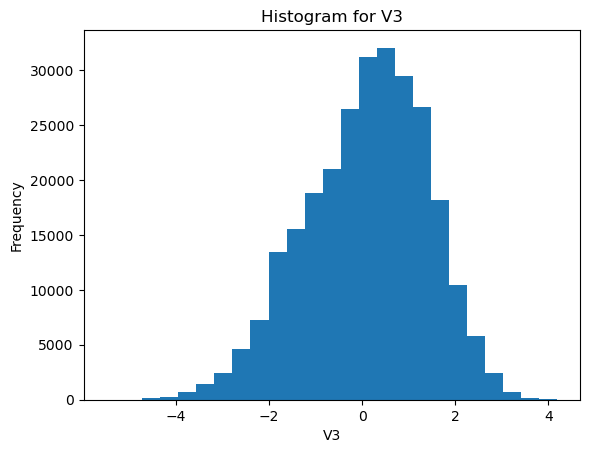

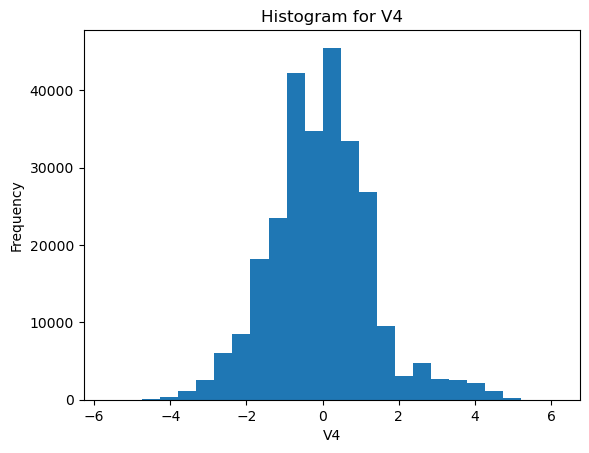

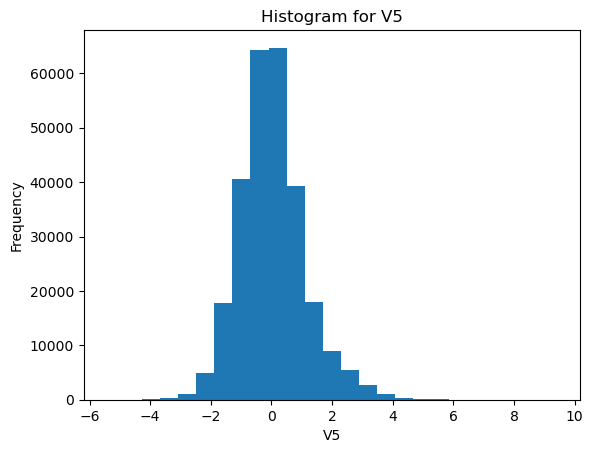

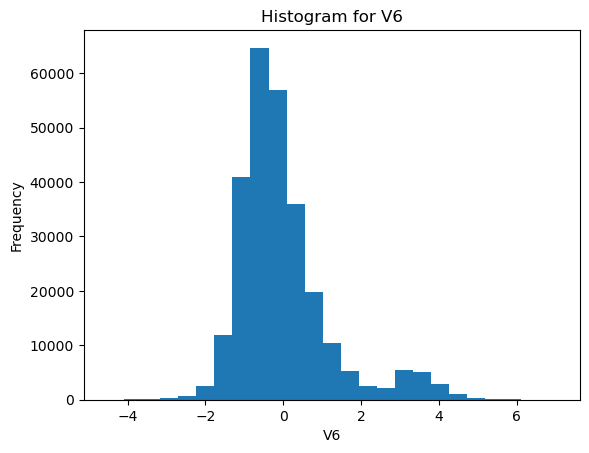

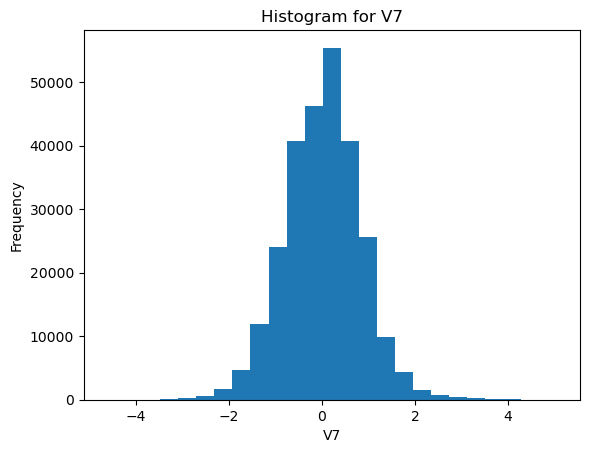

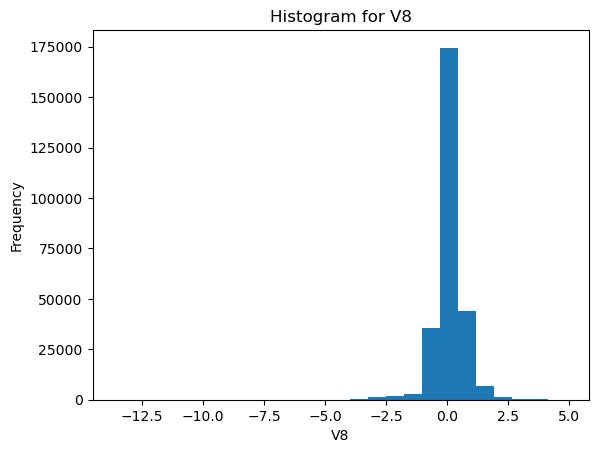

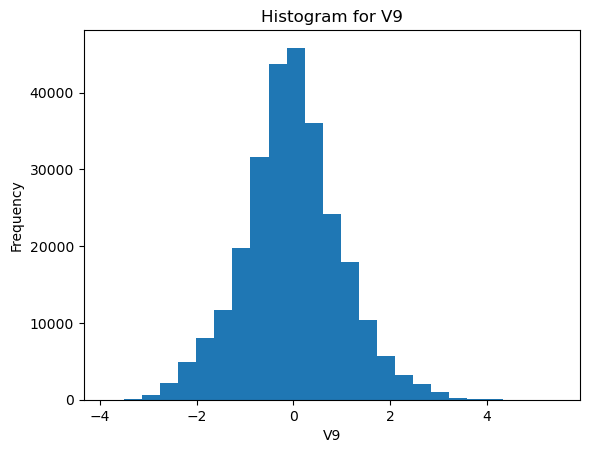

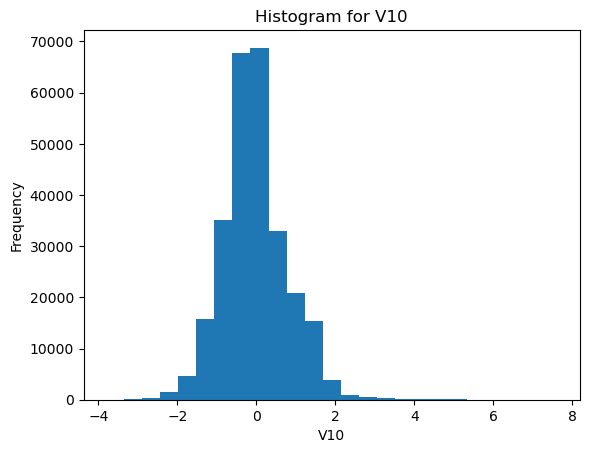

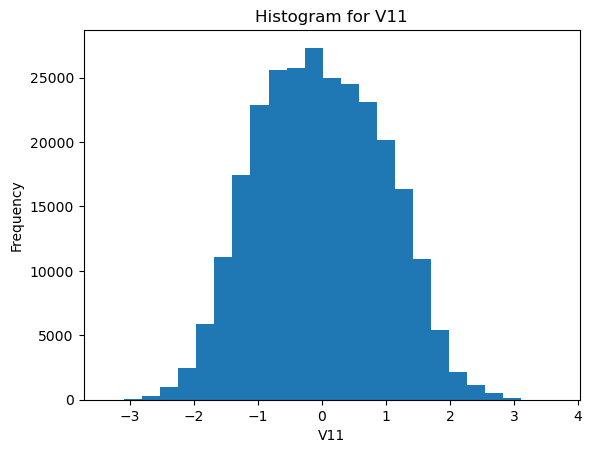

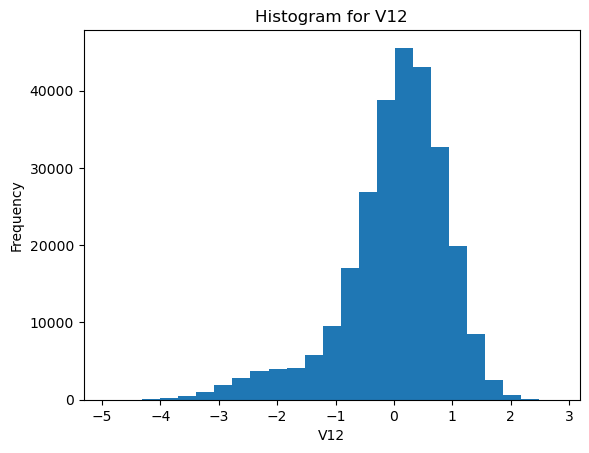

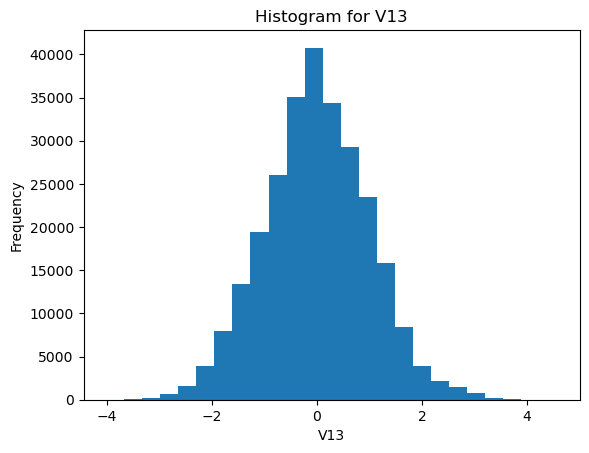

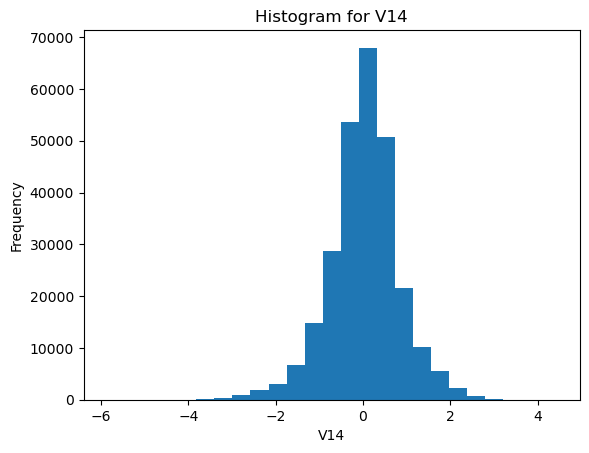

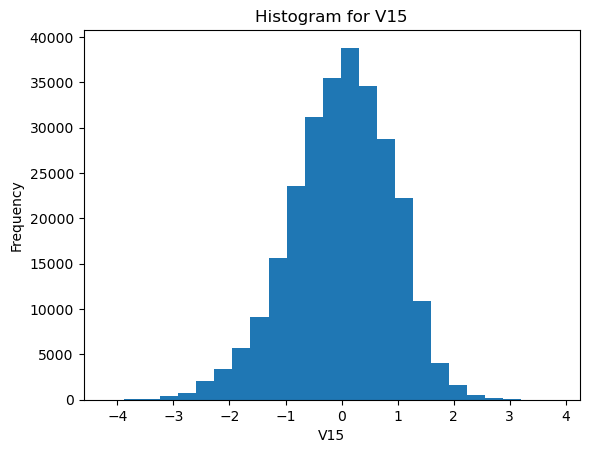

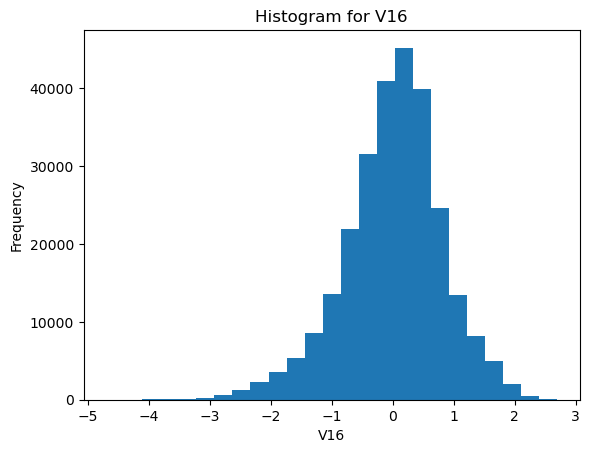

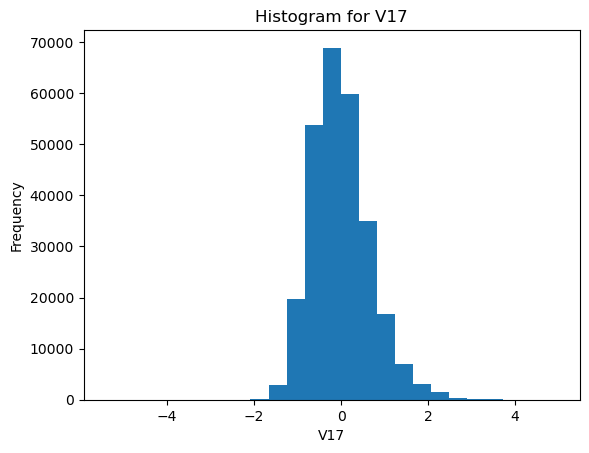

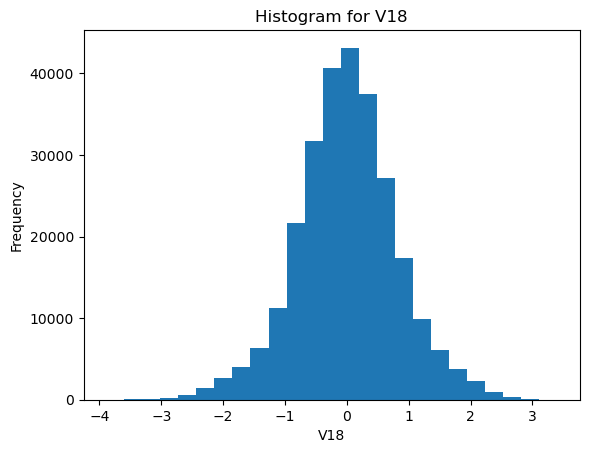

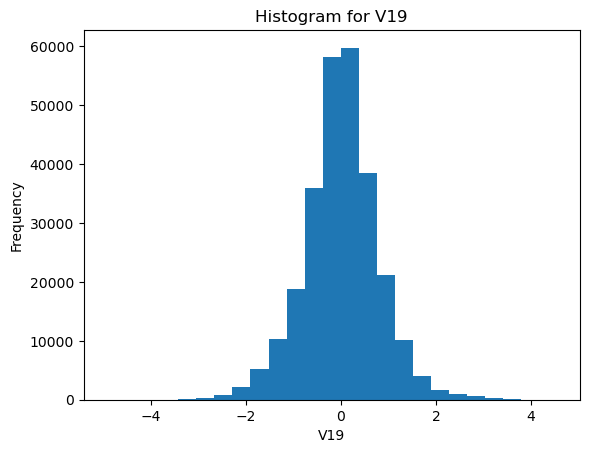

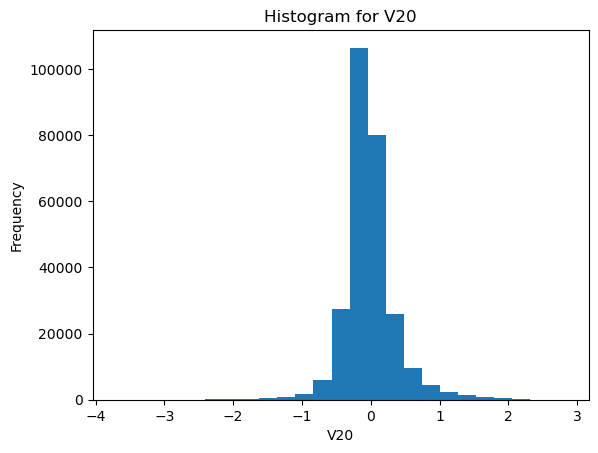

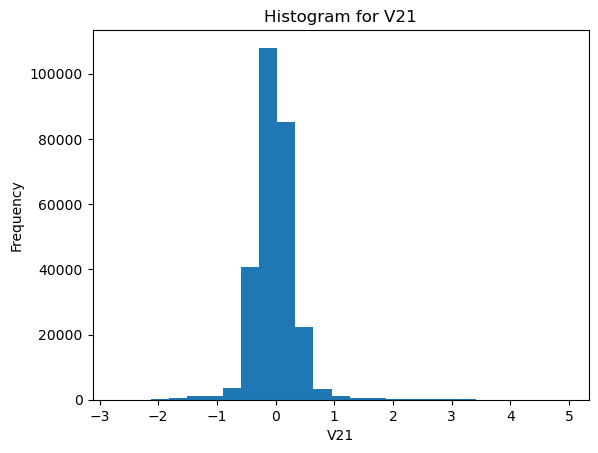

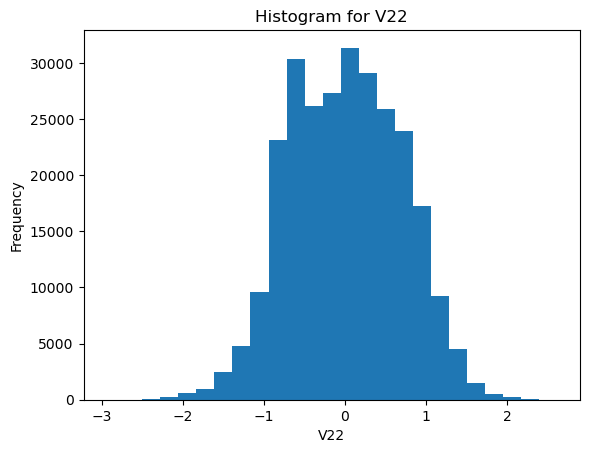

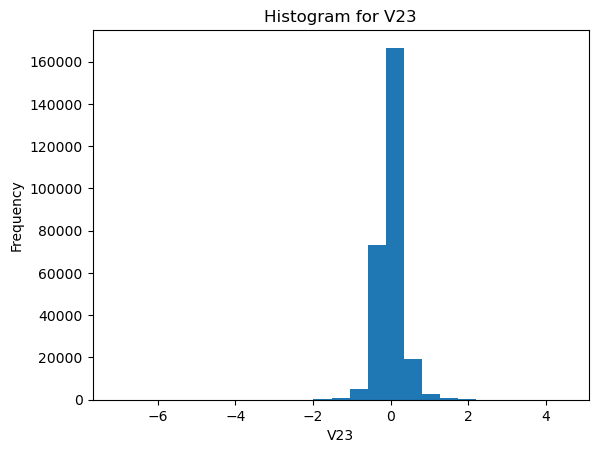

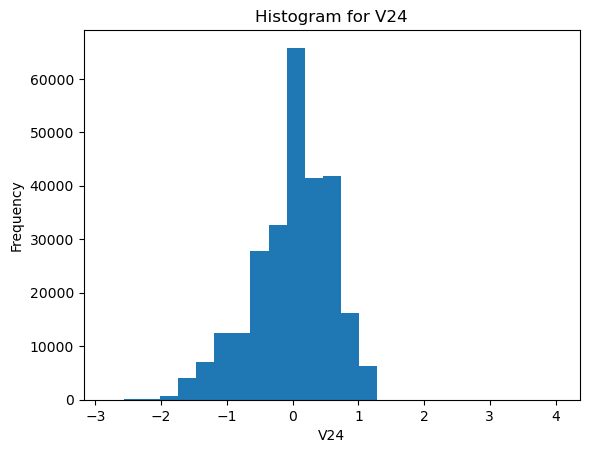

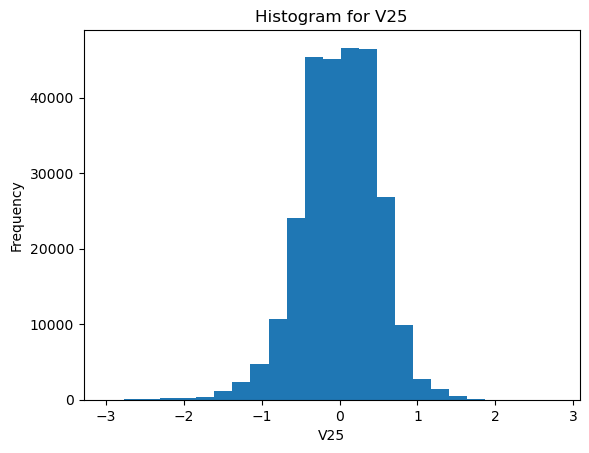

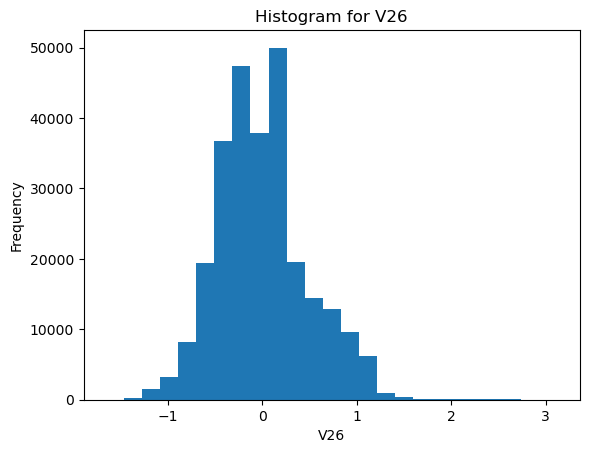

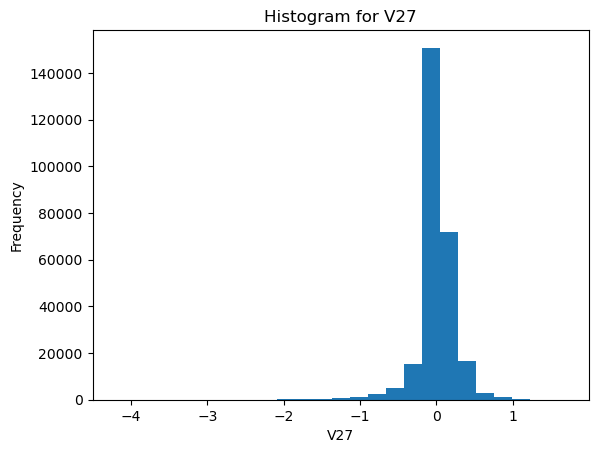

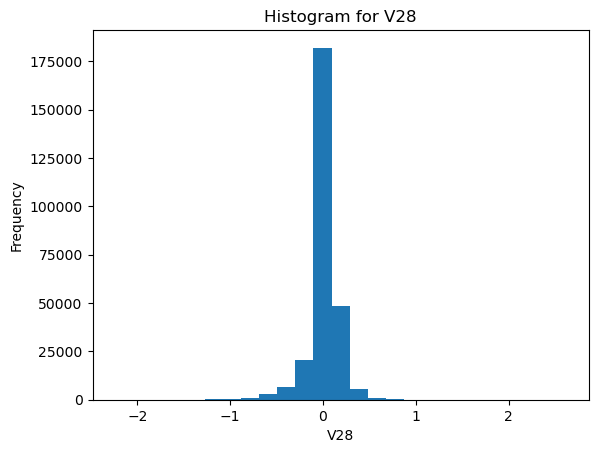

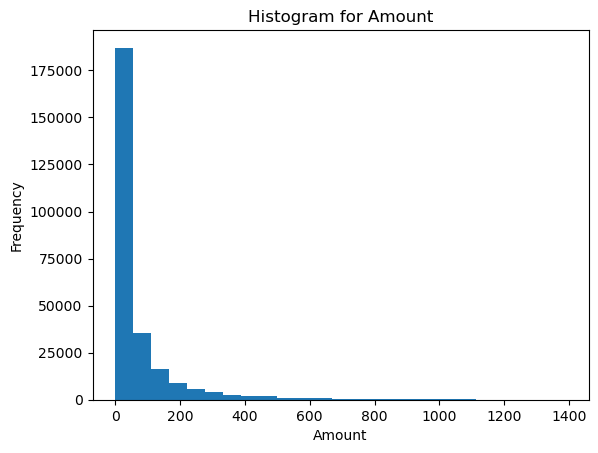

In [42]:
for feature in data_out2.columns:
    if feature != 'Class':
        plt.hist(data_out2[feature], bins=25)
        plt.title(f'Histogram for {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()

Dropping Outliers fixed the skewed the data

## Classification Models

### Classification Model Evaluation:

> Logistic Regression:

Achieved high accuracy (99.98%) on the test set.
The precision, recall, and F1-score for class 1 (fraud) are 0.00, indicating potential issues with the logistic regression model's ability to correctly classify fraudulent transactions.

> Decision Tree:

Similar to logistic regression, achieved high accuracy (99.97%) on the test set.
The precision, recall, and F1-score for class 1 are also 0.00, indicating potential issues with the decision tree model's ability to classify fraudulent transactions.

> Random Forest:

Achieved high accuracy (99.98%) on the test set.
Similar to logistic regression and decision tree, the precision, recall, and F1-score for class 1 are 0.00.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [49]:
X = data_out2.drop('Class', axis=1)
y = data_out2['Class']

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but recommended for many algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1. Logistic Regression

In [51]:
# Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))

Logistic Regression:
Accuracy: 0.9998328194078092
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53825
           1       0.00      0.00      0.00         9

    accuracy                           1.00     53834
   macro avg       0.50      0.50      0.50     53834
weighted avg       1.00      1.00      1.00     53834



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Decision Trees

In [52]:
# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree:
Accuracy: 0.9996842144369729
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53825
           1       0.00      0.00      0.00         9

    accuracy                           1.00     53834
   macro avg       0.50      0.50      0.50     53834
weighted avg       1.00      1.00      1.00     53834



3. Random Forest

In [53]:
# Random Forest
forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_forest))


Random Forest:
Accuracy: 0.9998328194078092
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53825
           1       0.00      0.00      0.00         9

    accuracy                           1.00     53834
   macro avg       0.50      0.50      0.50     53834
weighted avg       1.00      1.00      1.00     53834



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Key Findings and Insights

> Class Imbalance:
The dataset appears to be highly imbalanced, with very few instances of fraudulent transactions (Class 1). This imbalance can lead to models being biased towards the majority class.

> Model Performance Issues:
The models, especially logistic regression and decision tree, exhibit poor performance in detecting fraudulent transactions, as indicated by low precision, recall, and F1-score for class 1.

> Further Analysis:
Consider addressing class imbalance through techniques like oversampling or undersampling.
Experiment with different classification algorithms and hyperparameter tuning to improve model performance.
Evaluate the impact of removing outliers on model performance.